<a href="https://colab.research.google.com/github/reverievy/Customer-Segmentation-UK-Rail/blob/main/UK_Train_Segmentation-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [16]:
import pandas as pd
import numpy as np

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [18]:
# B.Import data through file stored in Google Drive
from google.colab import drive
drive.mount('/content/drive')
df_uk_train = pd.read_csv('/content/drive/MyDrive/DATA ANALYST/Data_For_Colab/uk_train_transaction.csv')
df_uk_train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request,combined_ticket_info
0,da8a6ba8-b3dc-4677-b176,12/8/2023,12:41:11,Online,Contactless,43,London Paddington,Liverpool Lime Street,1/1/2024,11:00:00,13:30:00,13:30:00,On Time,NaN,No,"{""ticket_class"": ""Standard"", ""ticket_type"": ""A..."
1,b0cdd1b0-f214-4197-be53,12/16/2023,11:23:01,Station,Credit Card,23,London Kings Cross,York,1/1/2024,9:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No,"{""ticket_class"": ""Standard"", ""ticket_type"": ""A..."
2,f3ba7a96-f713-40d9-9629,12/19/2023,19:51:27,Online,Credit Card,3,Liverpool Lime Street,Manchester Piccadilly,1/2/2024,18:15:00,18:45:00,18:45:00,On Time,NaN,No,"{""ticket_class"": ""Standard"", ""ticket_type"": ""A..."
3,b2471f11-4fe7-4c87-8ab4,12/20/2023,23:00:36,Station,Credit Card,13,London Paddington,Reading,1/1/2024,21:30:00,22:30:00,22:30:00,On Time,NaN,No,"{""ticket_class"": ""Standard"", ""ticket_type"": ""A..."
4,2be00b45-0762-485e-a7a3,12/27/2023,18:22:56,Online,Contactless,76,Liverpool Lime Street,London Euston,1/1/2024,16:45:00,19:00:00,19:00:00,On Time,NaN,No,"{""ticket_class"": ""Standard"", ""ticket_type"": ""A..."


In [19]:
#check data type, schema, and null values
df_uk_train.info()
#Reassign data type for datetime variables
df_uk_train['Date_of_Purchase'] = pd.to_datetime(df_uk_train['Date_of_Purchase'], format='%m/%d/%Y')
df_uk_train['Date_of_Journey'] = pd.to_datetime(df_uk_train['Date_of_Journey'], format='%m/%d/%Y')
df_uk_train['Date_of_Journey'] = pd.to_datetime(df_uk_train['Date_of_Journey'], format='%m/%d/%Y')
df_uk_train['Departure_Time'] = pd.to_datetime(df_uk_train['Departure_Time'], format='%H:%M:%S')
df_uk_train['Arrival_Time'] = pd.to_datetime(df_uk_train['Arrival_Time'], format='%H:%M:%S')
df_uk_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Transaction_ID        31653 non-null  object
 1   Date_of_Purchase      31653 non-null  object
 2   Time_of_Purchase      31653 non-null  object
 3   Purchase_Type         31653 non-null  object
 4   Payment_Method        31653 non-null  object
 5   Price                 31653 non-null  int64 
 6   Departure_Station     31653 non-null  object
 7   Arrival_Destination   31653 non-null  object
 8   Date_of_Journey       31653 non-null  object
 9   Departure_Time        31653 non-null  object
 10  Arrival_Time          31653 non-null  object
 11  Actual_Arrival_Time   29773 non-null  object
 12  Journey_Status        31653 non-null  object
 13  Reason_for_Delay      4172 non-null   object
 14  Refund_Request        31653 non-null  object
 15  combined_ticket_info  31653 non-null

In [20]:
# ** Check for Missing Values**
df_uk_train.isnull().sum()
#null = na

,0
Transaction_ID,0
Date_of_Purchase,0
Time_of_Purchase,0
Purchase_Type,0
Payment_Method,0
Price,0
Departure_Station,0
Arrival_Destination,0
Date_of_Journey,0
Departure_Time,0


In [21]:
#descriptive for numerical variable
#df_uk_train.describe(include='object')
df_uk_train.describe()

,Date_of_Purchase,Price,Date_of_Journey,Departure_Time,Arrival_Time
count,31653,31653.000000,31653,31653,31653
mean,2024-02-28 16:16:36.303667968,23.439200,2024-03-01 08:01:10.969576192,1900-01-01 12:01:51.856696064,1900-01-01 12:29:17.966069504
min,2023-12-08 00:00:00,1.000000,2024-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00
25%,2024-01-30 00:00:00,5.000000,2024-01-31 00:00:00,1900-01-01 07:00:00,1900-01-01 07:50:00
50%,2024-03-01 00:00:00,11.000000,2024-03-01 00:00:00,1900-01-01 12:00:00,1900-01-01 12:05:00
75%,2024-03-31 00:00:00,35.000000,2024-03-31 00:00:00,1900-01-01 17:45:00,1900-01-01 18:15:00
max,2024-04-30 00:00:00,267.000000,2024-04-30 00:00:00,1900-01-01 23:45:00,1900-01-01 23:50:00
std,NaN,29.997628,NaN,NaN,NaN


In [22]:
#d. Unique Values in Categorical (qualitative data) Columns
categorical_cols = ['Purchase_Type','Payment_Method','Departure_Station','Arrival_Destination','Journey_Status','Reason_for_Delay','Refund_Request']
for col in categorical_cols:
  print(f"Unique values in {col}: {df_uk_train[col].unique()}")

Unique values in Purchase_Type: ['Online' 'Station']
Unique values in Payment_Method: ['Contactless' 'Credit Card' 'Debit Card']
Unique values in Departure_Station: ['London Paddington' 'London Kings Cross' 'Liverpool Lime Street'
 'London Euston' 'York' 'Manchester Piccadilly' 'Birmingham New Street'
 'London St Pancras' 'Oxford' 'Reading' 'Edinburgh Waverley'
 'Bristol Temple Meads']
Unique values in Arrival_Destination: ['Liverpool Lime Street' 'York' 'Manchester Piccadilly' 'Reading'
 'London Euston' 'Oxford' 'Durham' 'London St Pancras'
 'Birmingham New Street' 'London Paddington' 'Bristol Temple Meads'
 'Tamworth' 'London Waterloo' 'Sheffield' 'Wolverhampton' 'Leeds'
 'Stafford' 'Doncaster' 'Swindon' 'Nottingham' 'Peterborough' 'Edinburgh'
 'Crewe' 'London Kings Cross' 'Leicester' 'Nuneaton' 'Didcot'
 'Edinburgh Waverley' 'Coventry' 'Wakefield' 'Cardiff Central'
 'Warrington']
Unique values in Journey_Status: ['On Time' 'Delayed' 'Cancelled']
Unique values in Reason_for_Delay: [n

In [23]:
#parse json
type(df_uk_train['combined_ticket_info'].iloc[0]) #it's a string json--> then apply json.loads
import json

# json.loads(s) parses the string and returns a Python dictionary. The new column parsed_ticket_info is now a json column
df_uk_train['parsed_ticket_info'] = df_uk_train['combined_ticket_info'].apply(json.loads)
print(df_uk_train['parsed_ticket_info'])

#extract keys into specified columns
df_uk_train['ticket_class'] = df_uk_train['parsed_ticket_info'].apply(lambda x: x.get('ticket_class'))
print(df_uk_train['ticket_class'])
df_uk_train['ticket_type'] = df_uk_train['parsed_ticket_info'].apply(lambda x: x.get('ticket_type'))
print(df_uk_train['ticket_type'])
df_uk_train['railcard'] = df_uk_train['parsed_ticket_info'].apply(lambda x: x.get('railcard'))
print(df_uk_train['railcard'])
df_uk_train.head()

0        {'ticket_class': 'Standard', 'ticket_type': 'A...
1        {'ticket_class': 'Standard', 'ticket_type': 'A...
2        {'ticket_class': 'Standard', 'ticket_type': 'A...
3        {'ticket_class': 'Standard', 'ticket_type': 'A...
4        {'ticket_class': 'Standard', 'ticket_type': 'A...
                               ...                        
31648    {'ticket_class': 'Standard', 'ticket_type': 'O...
31649    {'ticket_class': 'Standard', 'ticket_type': 'O...
31650    {'ticket_class': 'Standard', 'ticket_type': 'O...
31651    {'ticket_class': 'Standard', 'ticket_type': 'O...
31652    {'ticket_class': 'Standard', 'ticket_type': 'O...
Name: parsed_ticket_info, Length: 31653, dtype: object
0        Standard
1        Standard
2        Standard
3        Standard
4        Standard
           ...   
31648    Standard
31649    Standard
31650    Standard
31651    Standard
31652    Standard
Name: ticket_class, Length: 31653, dtype: object
0         Advance
1         Advance
2         Adv

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request,combined_ticket_info,parsed_ticket_info,ticket_class,ticket_type,railcard
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,43,London Paddington,Liverpool Lime Street,2024-01-01,1900-01-01 11:00:00,1900-01-01 13:30:00,13:30:00,On Time,NaN,No,"{""ticket_class"": ""Standard"", ""ticket_type"": ""A...","{'ticket_class': 'Standard', 'ticket_type': 'A...",Standard,Advance,Adult
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,23,London Kings Cross,York,2024-01-01,1900-01-01 09:45:00,1900-01-01 11:35:00,11:40:00,Delayed,Signal Failure,No,"{""ticket_class"": ""Standard"", ""ticket_type"": ""A...","{'ticket_class': 'Standard', 'ticket_type': 'A...",Standard,Advance,Adult
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,1900-01-01 18:15:00,1900-01-01 18:45:00,18:45:00,On Time,NaN,No,"{""ticket_class"": ""Standard"", ""ticket_type"": ""A...","{'ticket_class': 'Standard', 'ticket_type': 'A...",Standard,Advance,No info
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,13,London Paddington,Reading,2024-01-01,1900-01-01 21:30:00,1900-01-01 22:30:00,22:30:00,On Time,NaN,No,"{""ticket_class"": ""Standard"", ""ticket_type"": ""A...","{'ticket_class': 'Standard', 'ticket_type': 'A...",Standard,Advance,No info
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,76,Liverpool Lime Street,London Euston,2024-01-01,1900-01-01 16:45:00,1900-01-01 19:00:00,19:00:00,On Time,NaN,No,"{""ticket_class"": ""Standard"", ""ticket_type"": ""A...","{'ticket_class': 'Standard', 'ticket_type': 'A...",Standard,Advance,No info


In [24]:
#Frequency table for categorical/string variable
freq_table = pd.crosstab(df_uk_train['railcard'], 'frequency')
print(freq_table)

frequencytable1 = df_uk_train['Purchase_Type'].value_counts()
print(frequencytable1)

frequencytable2 = df_uk_train['Payment_Method'].value_counts()
print(frequencytable2)

col_0     frequency
railcard           
Adult          4846
Disabled       3089
No info       20918
Senior         2800
Purchase_Type
Online     18521
Station    13132
Name: count, dtype: int64
Payment_Method
Credit Card    19136
Contactless    10834
Debit Card      1683
Name: count, dtype: int64


In [25]:
# Check for Unique Values in the json columns
json_cols = ['ticket_class','ticket_type','railcard']
for col in json_cols:
  print(f"Unique values in {col}: {df_uk_train[col].unique()}")

Unique values in ticket_class: ['Standard' 'First Class']
Unique values in ticket_type: ['Advance' 'Off-Peak' 'Anytime']
Unique values in railcard: ['Adult' 'No info' 'Disabled' 'Senior']


In [26]:
#Standardize train station names: edinburgh vs edinburgh waverley
df_uk_train['Arrival_Destination'] = df_uk_train['Arrival_Destination'].replace('Edinburgh', 'Edinburgh Waverley')
freq_table4 = pd.crosstab(df_uk_train['Arrival_Destination'], 'frequency')

In [27]:
#Create a new Origin-Destination column for analysis name od_route
df_uk_train['od_route'] = df_uk_train['Departure_Station']+'-'+df_uk_train['Arrival_Destination']
df_uk_train['od_route'].head()

,od_route
0,London Paddington-Liverpool Lime Street
1,London Kings Cross-York
2,Liverpool Lime Street-Manchester Piccadilly
3,London Paddington-Reading
4,Liverpool Lime Street-London Euston


<Axes: xlabel='trip_duration', ylabel='Count'>

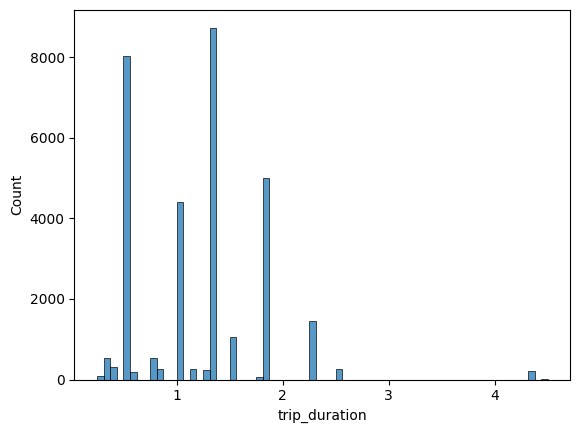

In [28]:
#Create a route duration column in minutes.
#Fix arrival time if it's a next-day arrival: Adds one full day (24 hours) to the arrival time, correcting it to the next day
df_uk_train.loc[df_uk_train['Arrival_Time'] < df_uk_train['Departure_Time'], 'Arrival_Time'] += pd.Timedelta(days=1)
df_uk_train['trip_duration'] = ((df_uk_train['Arrival_Time'] - df_uk_train['Departure_Time']).dt.total_seconds() / 3600).round(2)
df_uk_train['trip_duration'].describe()
sns.histplot(df_uk_train['trip_duration'])

Min: 0.25 hour
Mean: 1.2 hour
Max: 4.5 hour

75% of trips fall under 1.5 hour --> short journey is dominant


Short trip: under an hour
Medium trip: 1-3 hour
Long trip: >3 hour

In [29]:
# Create a Price_Range column with 6 tiers that categorize prices within each ticket class (Standard or First Class) into low, medium, and high
#low < 15,  59 >= medium >= 15, high >59 - FC
#low < 4, 4 <= medium <= 24, high >24 standard

def price_categorize (row):
  price = row['Price']
  tickclass = row['ticket_class']
  if tickclass == 'Standard':
    if price <= 4:
      return 'Standard Low'
    if 4 < price < 24:
      return 'Standard Medium'
    else:
      return 'Standard High'
  if tickclass == 'First Class':
    if price <= 15:
      return 'FC Low'
    if 15 < price < 59:
      return 'FC Medium'
    else:
      return 'FC High'

df_uk_train['price_range'] = df_uk_train.apply(price_categorize, axis=1)
df_uk_train.head()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,...,Reason_for_Delay,Refund_Request,combined_ticket_info,parsed_ticket_info,ticket_class,ticket_type,railcard,od_route,trip_duration,price_range
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,43,London Paddington,Liverpool Lime Street,2024-01-01,1900-01-01 11:00:00,...,NaN,No,"{""ticket_class"": ""Standard"", ""ticket_type"": ""A...","{'ticket_class': 'Standard', 'ticket_type': 'A...",Standard,Advance,Adult,London Paddington-Liverpool Lime Street,2.50,Standard High
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,23,London Kings Cross,York,2024-01-01,1900-01-01 09:45:00,...,Signal Failure,No,"{""ticket_class"": ""Standard"", ""ticket_type"": ""A...","{'ticket_class': 'Standard', 'ticket_type': 'A...",Standard,Advance,Adult,London Kings Cross-York,1.83,Standard Medium
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,1900-01-01 18:15:00,...,NaN,No,"{""ticket_class"": ""Standard"", ""ticket_type"": ""A...","{'ticket_class': 'Standard', 'ticket_type': 'A...",Standard,Advance,No info,Liverpool Lime Street-Manchester Piccadilly,0.50,Standard Low
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,13,London Paddington,Reading,2024-01-01,1900-01-01 21:30:00,...,NaN,No,"{""ticket_class"": ""Standard"", ""ticket_type"": ""A...","{'ticket_class': 'Standard', 'ticket_type': 'A...",Standard,Advance,No info,London Paddington-Reading,1.00,Standard Medium
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,76,Liverpool Lime Street,London Euston,2024-01-01,1900-01-01 16:45:00,...,NaN,No,"{""ticket_class"": ""Standard"", ""ticket_type"": ""A...","{'ticket_class': 'Standard', 'ticket_type': 'A...",Standard,Advance,No info,Liverpool Lime Street-London Euston,2.25,Standard High


# EDA

Overall View

#  Purchase Behaviors


In [20]:
#Overall view: total ticket sales volume
sales_volume = df_uk_train['Price'].sum()
print(sales_volume)

##Average ticket value per ticket class
channel_average2 = df_uk_train.groupby('ticket_class')['Price'].agg(['mean', 'count','sum'])
channel_average2['count_percentage'] = (channel_average2['count'] / channel_average2['count'].sum()) * 100
channel_average2['sales_percentage'] = (channel_average2['sum'] / channel_average2['sum'].sum()) * 100
print(channel_average2)

##Average ticket value per ticket type
channel_average3 = df_uk_train.groupby('ticket_type')['Price'].agg(['mean', 'count']).reset_index()
channel_average3['percentage'] = (channel_average3['count'] / channel_average3['count'].sum()) * 100
print(channel_average3)

##Average ticket value per payment method
channel_average4 = df_uk_train.groupby('Payment_Method')['Price'].agg(['mean', 'count']).reset_index()
channel_average4['percentage'] = (channel_average4['count'] / channel_average4['count'].sum()) * 100
print(channel_average4)

741921
                   mean  count     sum  count_percentage  sales_percentage
ticket_class                                                              
First Class   48.855134   3058  149399          9.661012          20.13678
Standard      20.721175  28595  592522         90.338988          79.86322
  ticket_type       mean  count  percentage
0     Advance  17.611412  17561   55.479733
1     Anytime  39.196442   5340   16.870439
2    Off-Peak  25.518510   8752   27.649828
  Payment_Method       mean  count  percentage
0    Contactless  20.255123  10834   34.227403
1    Credit Card  24.535483  19136   60.455565
2     Debit Card  31.471182   1683    5.317032


Break down by Ticket Class

  ticket_class       mean     sum  count  count_percentage
0  First Class  48.855134  149399   3058              9.66
1     Standard  20.721175  592522  28595             90.34


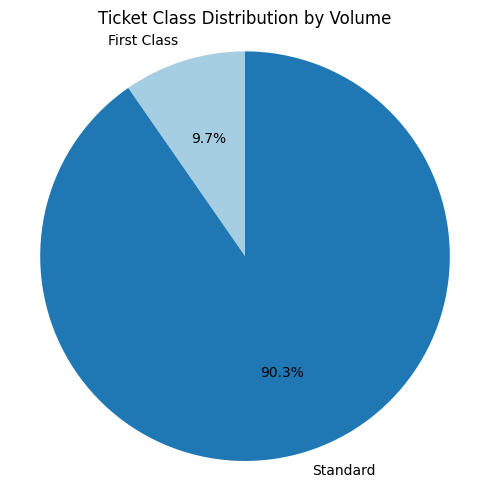

In [21]:
# Price by ticket class
#average ticket price by ticket class
df_price_ticketclass = df_uk_train.groupby('ticket_class')['Price'].agg(['mean', 'sum', 'count']).reset_index()
df_price_ticketclass['count_percentage'] = (df_price_ticketclass['count'] / df_price_ticketclass['count'].sum() * 100).round(2)
print(df_price_ticketclass)

#pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    df_price_ticketclass['count_percentage'],
    labels=df_price_ticketclass['ticket_class'],
    startangle=90,
    autopct='%1.1f%%', #add percentage,
    colors=plt.cm.Paired.colors)
plt.title('Ticket Class Distribution by Volume')
plt.axis('equal')  # Ensures it's a perfect circle
plt.tight_layout()
plt.show()


  ticket_type       mean  count  count_percentage
0     Advance  17.611412  17561         55.479733
1     Anytime  39.196442   5340         16.870439
2    Off-Peak  25.518510   8752         27.649828


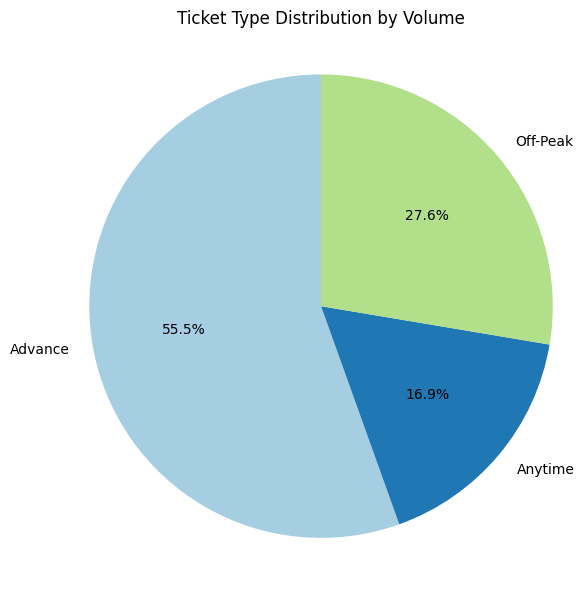

<ipython-input-22-3424032471>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = channel_average3, x = 'ticket_type', y = 'mean', palette = 'mako')


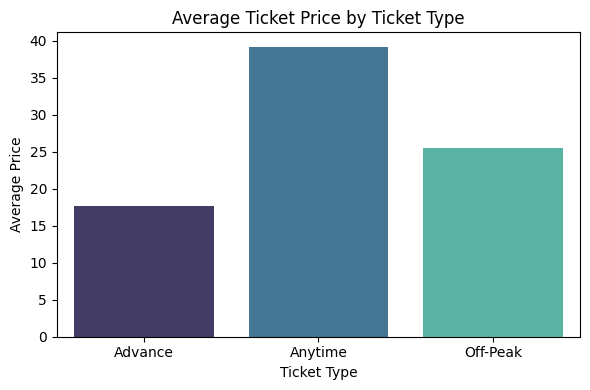

In [22]:
# Price by ticket type: Anytime Spenders spend much more
channel_average3 = df_uk_train.groupby('ticket_type')['Price'].agg(['mean', 'count']).reset_index()
channel_average3['count_percentage'] = (channel_average3['count'] / channel_average3['count'].sum()) * 100
print(channel_average3)

#pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    channel_average3['count_percentage'],
    labels=channel_average3['ticket_type'],
    startangle=90,
    autopct='%1.1f%%', #add percentage,
    colors=plt.cm.Paired.colors)

plt.title('Ticket Type Distribution by Volume')
plt.axis('equal')  # Ensures it's a perfect circle
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data = channel_average3, x = 'ticket_type', y = 'mean', palette = 'mako')
plt.title('Average Ticket Price by Ticket Type')
plt.ylabel('Average Price')
plt.xlabel('Ticket Type')
plt.tight_layout()
plt.show()


**Break Down by Buying Channel**
Is there a significant difference in average ticket price between online and station purchases? between payment methods?
--> which channel/method drives high-value purchases?



  Purchase_Type       mean  count  percentage
0        Online  20.665947  18521   58.512621
1       Station  27.350518  13132   41.487379


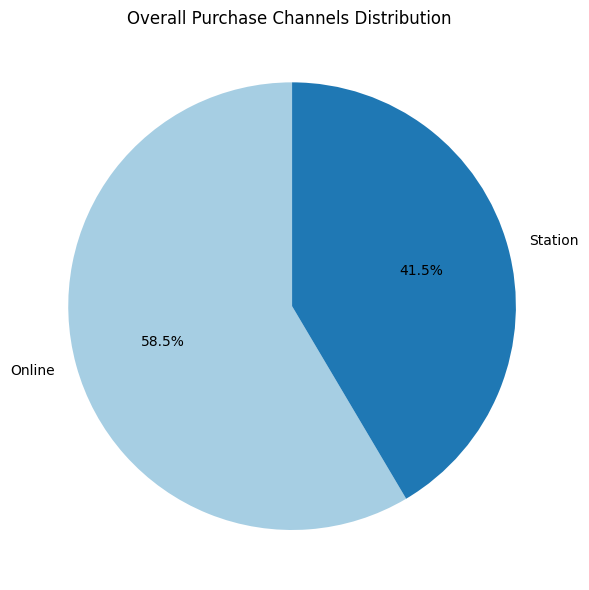

                                 mean  count  percentage
ticket_class Purchase_Type                              
First Class  Online         44.669287   1781       58.24
             Station        54.693031   1277       41.76
Standard     Online         18.112186  16740       58.54
             Station        24.405230  11855       41.46
                                mean  count  percentage
ticket_type Purchase_Type                              
Advance     Online         15.538789  10338       58.87
            Station        20.577876   7223       41.13
Anytime     Online         31.725008   3331       62.38
            Station        51.584370   2009       37.62
Off-Peak    Online         23.997939   4852       55.44
            Station        27.410256   3900       44.56


In [23]:
##Purchase channel distribution
channel_average1 = df_uk_train.groupby('Purchase_Type')['Price'].agg(['mean', 'count']).reset_index()
channel_average1['percentage'] = (channel_average1['count'] / channel_average1['count'].sum()) * 100
print(channel_average1)
#pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    channel_average1['percentage'],
    labels=channel_average1['Purchase_Type'],
    startangle=90,
    autopct='%1.1f%%', #add percentage,
    colors=plt.cm.Paired.colors)

plt.title('Overall Purchase Channels Distribution ')
plt.axis('equal')  # Ensures it's a perfect circle
plt.tight_layout()
plt.show()

#breakdown by ticket class

channelclass_average = df_uk_train.groupby(['ticket_class','Purchase_Type'])['Price'].agg(['mean', 'count'])
channelclass_average['percentage']=channelclass_average.groupby('ticket_class')['count'].transform(lambda x: x/x.sum()*100).round(2)
print(channelclass_average)

#breakdown by ticket type
channeltype_average = df_uk_train.groupby(['ticket_type','Purchase_Type'])['Price'].agg(['mean', 'count'])
channeltype_average['percentage']=channeltype_average.groupby('ticket_type')['count'].transform(lambda x: x/x.sum()*100).round(2)
print(channeltype_average)

In [24]:
#t-test for mean of ticket price across online & offline buying channel
from statsmodels.stats.weightstats import ttest_ind
!pip install pingouin
import pingouin as pg
import scipy.stats as stats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.1 MB/s eta 0:00:00


In [25]:
#slice df
online_price = df_uk_train['Price'][df_uk_train['Purchase_Type']=='Online']
station_price = df_uk_train['Price'][df_uk_train['Purchase_Type']=='Station']
online_price.head()
# Conducting two-sample ttest
ttest1 = pg.ttest(online_price,
                  station_price,
                  correction=True) #The standardtwo sample t-test will be conducted by taking into consideration the homogeneity assumption.
print(ttest1)

                T           dof alternative         p-val           CI95%  \
T-test -18.505291  21776.464672   two-sided  7.148796e-76  [-7.39, -5.98]   

         cohen-d       BF10  power  
T-test  0.224188  1.088e+72    1.0  


- Null hypothesis (H0): The average ticket price for Online and Station purchases is the same.
- Alternative hypothesis (H1): The average ticket prices are different between Online and Station purchases.
> There is a statistically significant difference in average ticket prices between online and station purchases, and likely not
by chance. The effect size is small ( cohen-d = 0.22)

        price_range Purchase_Type  count  percentage
10  Standard Medium        Online   9017       63.75
11  Standard Medium       Station   5127       36.25
8      Standard Low        Online   3870       53.59
9      Standard Low       Station   3351       46.41
6     Standard High        Online   3853       53.29
7     Standard High       Station   3377       46.71
4         FC Medium        Online    880       60.07
5         FC Medium       Station    585       39.93
2            FC Low        Online    497       61.66
3            FC Low       Station    309       38.34
0           FC High        Online    404       51.33
1           FC High       Station    383       48.67


<Axes: xlabel='price_range', ylabel='percentage'>

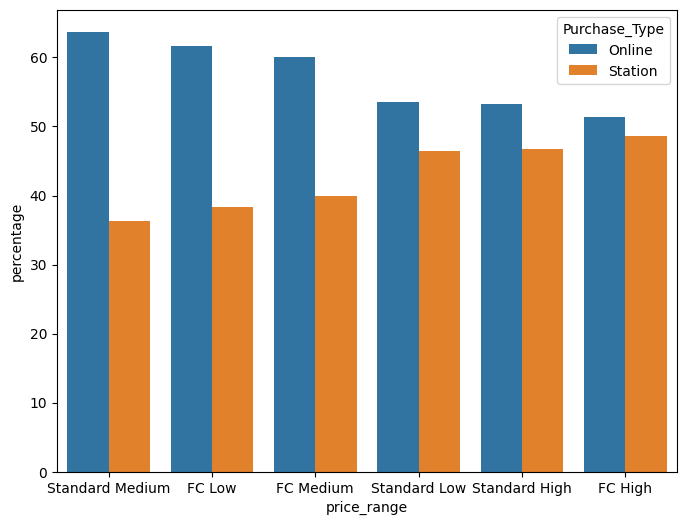

In [26]:
#Are higher value tickets purchase online or station using price range
highervalueticket = df_uk_train.groupby(['price_range','Purchase_Type'])['Price'].agg(['count']).reset_index().sort_values(by=['price_range'],ascending = False)
highervalueticket['percentage']=highervalueticket.groupby('price_range')['count'].transform(lambda x: x/x.sum()*100).round(2)
print(highervalueticket)
#reorder the chart based on online percentage descending
chartorder = (highervalueticket[highervalueticket['Purchase_Type'] == 'Online'].sort_values('percentage', ascending=False)['price_range'].values)
plt.figure(figsize=(8, 6))
sns.barplot(data=highervalueticket,x='price_range',y='percentage',hue='Purchase_Type',order=chartorder)

- station purchase seems to drive higher average purchase for both ticket class --> more prone to time urgency?
- yet online seems to drive higher purchase frequency for both class -> more convenient, perhaps
can conduct ttest

   Payment_Method      price_range  count  percentage
0     Contactless          FC High    220        2.03
1     Contactless           FC Low    334        3.08
2     Contactless        FC Medium    482        4.45
3     Contactless    Standard High   2494       23.02
4     Contactless     Standard Low   2802       25.86
5     Contactless  Standard Medium   4502       41.55
6     Credit Card          FC High    499        2.61
7     Credit Card           FC Low    457        2.39
8     Credit Card        FC Medium    889        4.65
9     Credit Card    Standard High   4271       22.32
10    Credit Card     Standard Low   4140       21.63
11    Credit Card  Standard Medium   8880       46.40
12     Debit Card          FC High     68        4.04
13     Debit Card           FC Low     15        0.89
14     Debit Card        FC Medium     94        5.59
15     Debit Card    Standard High    465       27.63
16     Debit Card     Standard Low    279       16.58
17     Debit Card  Standard 

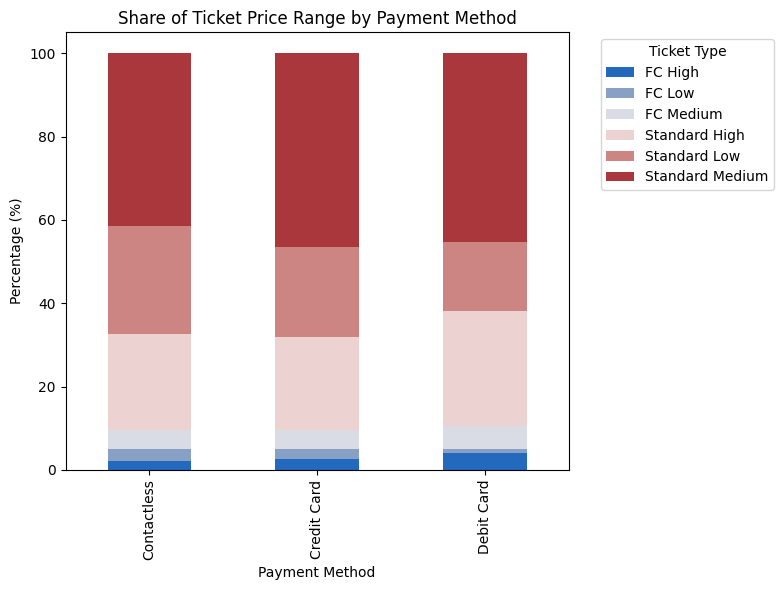

In [36]:
#Ticket Price Range by Payment Method
pricerange = df_uk_train.groupby(['Payment_Method','price_range'])['price_range'].value_counts().reset_index()
pricerange['percentage'] = pricerange.groupby('Payment_Method')['count'].transform(lambda x: x/x.sum()*100).round(2)
print(pricerange)

pricerange_high = pricerange[pricerange['price_range'].isin(['FC High','Standard High'])]
#within each payment method, FC high and Standard high make up the highest percentage of transaction for debit card

debit_prices = df_uk_train[df_uk_train['Payment_Method'] == 'Debit Card']['Price']
credit_prices = df_uk_train[df_uk_train['Payment_Method'] == 'Credit Card']['Price']

pivot_df = pricerange.pivot(index='Payment_Method', columns='price_range', values='percentage').fillna(0)
pivot_df.plot(
    kind='bar',
    stacked=True,
    colormap='vlag',
    figsize=(8, 6))

plt.title('Share of Ticket Price Range by Payment Method')
plt.ylabel('Percentage (%)')
plt.xlabel('Payment Method')
plt.legend(title='Ticket Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Breakdown by Ticket Type

In [30]:
#Detail breakdown by ticket type
channelclass_average = df_uk_train.groupby(['Purchase_Type','ticket_type'])['Price'].agg(['mean', 'count'])
print(channelclass_average)

                                mean  count
Purchase_Type ticket_type                  
Online        Advance      15.538789  10338
              Anytime      31.725008   3331
              Off-Peak     23.997939   4852
Station       Advance      20.577876   7223
              Anytime      51.584370   2009
              Off-Peak     27.410256   3900


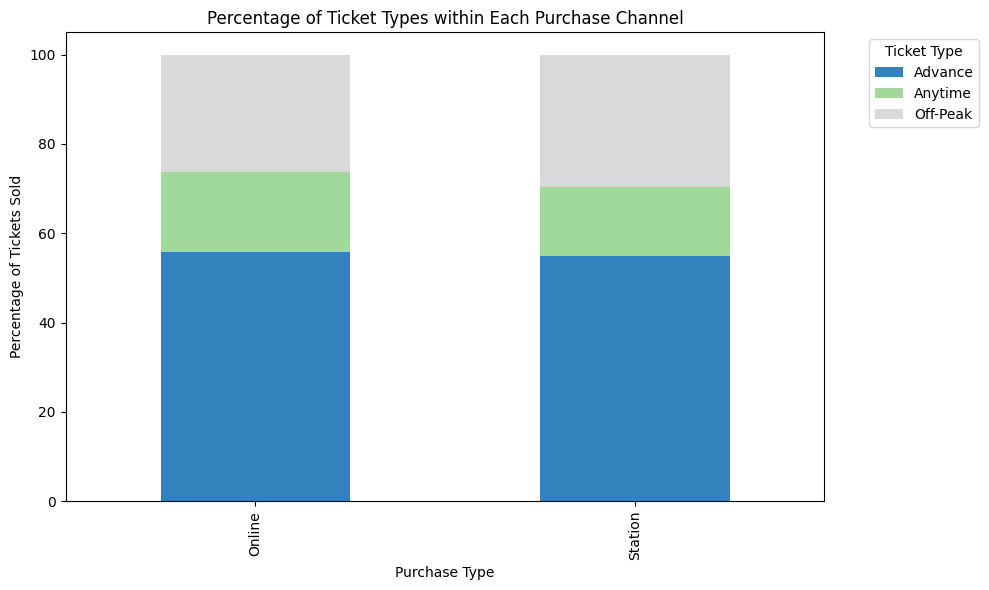

In [31]:
#stacked bar by ticket type
channelclass_average = df_uk_train.groupby(['Purchase_Type', 'ticket_type'])['Price'].agg(['mean', 'count'])
total_counts_per_purchase_type = channelclass_average.groupby(level=0)['count'].transform('sum')
channelclass_average['count_percentage'] = (channelclass_average['count'] / total_counts_per_purchase_type) * 100
channelclass_average = channelclass_average.reset_index()

pivot_df = channelclass_average.pivot(index='Purchase_Type', columns='ticket_type', values='count_percentage')
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')
plt.title('Percentage of Ticket Types within Each Purchase Channel')
plt.xlabel('Purchase Type')
plt.ylabel('Percentage of Tickets Sold')
plt.legend(title='Ticket Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

                                             mean  count
Purchase_Type ticket_class ticket_type                  
Online        First Class  Advance      34.474038   1040
                           Anytime      64.894915    295
                           Off-Peak     55.065022    446
              Standard     Advance      13.420843   9298
                           Anytime      28.501976   3036
                           Off-Peak     20.853155   4406
Station       First Class  Advance      42.863260    724
                           Anytime      95.882051    195
                           Off-Peak     56.181564    358
              Standard     Advance      18.095245   6499
                           Anytime      46.822492   1814
                           Off-Peak     24.502259   3542


<Figure size 1000x800 with 0 Axes>

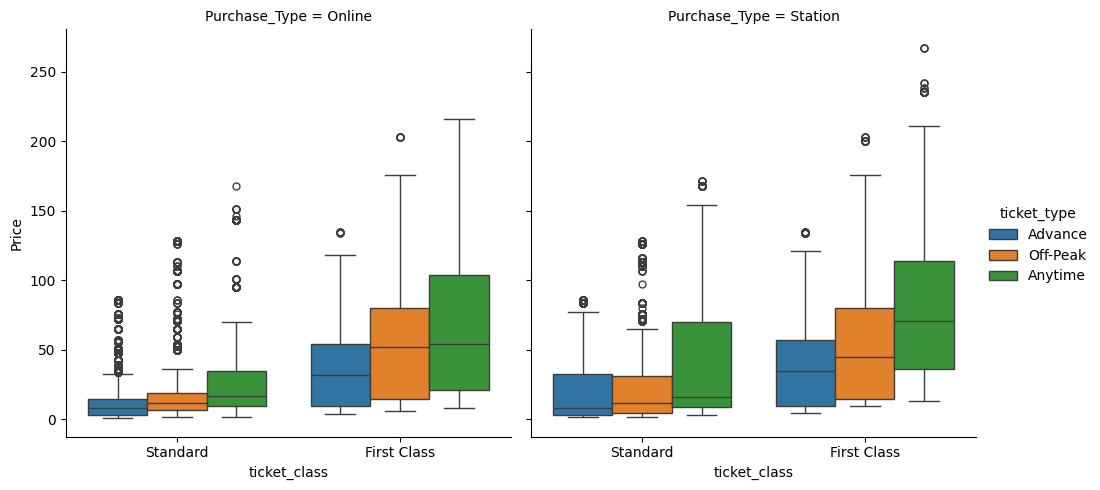

In [32]:
#Detail breakdown by ticket type
typeclass_average = df_uk_train.groupby(['Purchase_Type','ticket_class','ticket_type'])['Price'].agg(['mean', 'count'])
print(typeclass_average)

plt.figure(figsize=(10, 8))
sns.catplot(
    data=df_uk_train,
    x='ticket_class',
    y='Price',
    hue='ticket_type',
    col='Purchase_Type', #creates small multiples (facets) to show how the distribution varies across ticket_type
    kind='box',
    height=5,
    aspect=1
)

#plt.tight_layout()
plt.show()

Breakdown by Payment Method

  Payment_Method       mean  count  percentage
0    Contactless  20.255123  10834   34.227403
1    Credit Card  24.535483  19136   60.455565
2     Debit Card  31.471182   1683    5.317032
                               mean  count  percentage
Purchase_Type Payment_Method                          
Station       Credit Card     29.56   7649       58.25
              Contactless     22.62   4444       33.84
              Debit Card      31.33   1039        7.91
Online        Credit Card     21.19  11487       62.02
              Contactless     18.61   6390       34.50
              Debit Card      31.70    644        3.48
                     mean  count
Payment_Method                  
Debit Card      31.471182   1683
Credit Card     24.535483  19136
Contactless     20.255123  10834


<ipython-input-37-941035474>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment_Method', y='mean',data=payment_average3,palette='mako')


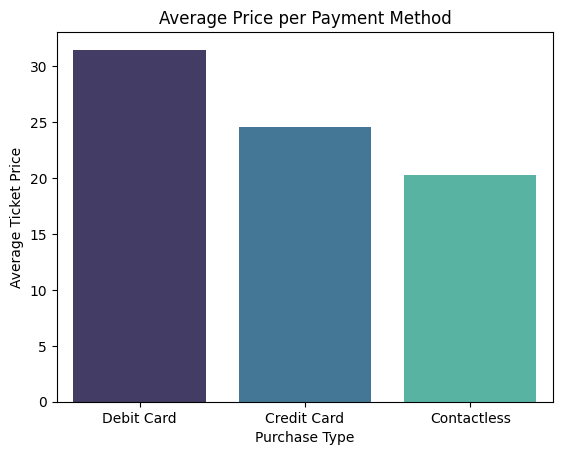

                                 mean  count
ticket_type Payment_Method                  
Anytime     Debit Card      44.859223    412
Off-Peak    Debit Card      37.075718    383
Advance     Debit Card      22.842342    888
Anytime     Credit Card     40.392173   3654
Off-Peak    Credit Card     26.188871   4924
Advance     Credit Card     18.276568  10558
Anytime     Contactless     33.935636   1274
Off-Peak    Contactless     23.275472   3445
Advance     Contactless     15.703352   6115


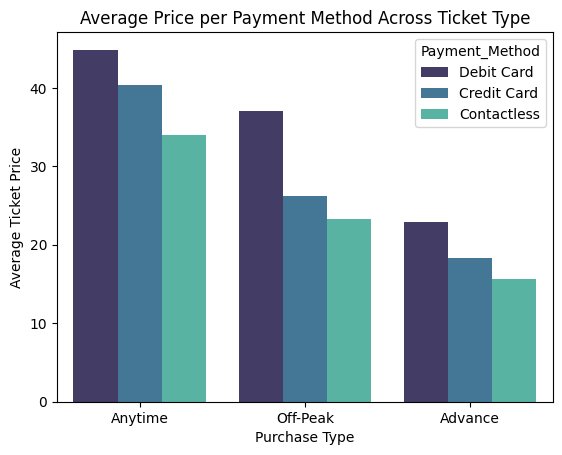

                                  mean  count
ticket_class Payment_Method                  
First Class  Debit Card      59.903955    177
Standard     Debit Card      28.129482   1506
First Class  Credit Card     50.619512   1845
Standard     Credit Card     21.752241  17291
First Class  Contactless     43.825290   1036
Standard     Contactless     17.762911   9798


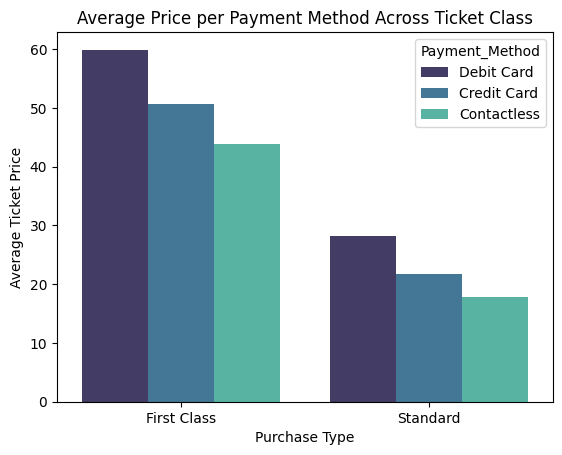

In [37]:
#Detail breakdown by payment method
##Average ticket value per payment method
channel_average4 = df_uk_train.groupby('Payment_Method')['Price'].agg(['mean', 'count']).reset_index()
channel_average4['percentage'] = (channel_average4['count'] / channel_average4['count'].sum()) * 100
print(channel_average4)

payment_average = df_uk_train.groupby(['Purchase_Type','Payment_Method'])['Price'].agg(['mean', 'count']).sort_values(by=['Purchase_Type','count'], ascending=False)
# Calculate percentage within each payment type using lambda. the railcard level is the x.sum(). x is the ticket type bucket
payment_average['percentage'] = payment_average.groupby('Purchase_Type')['count'].transform(lambda x: x/x.sum()*100).round(2)
print(payment_average.round(2))

#Compare average price by payment method.
payment_average3 = df_uk_train.groupby(['Payment_Method'])['Price'].agg(['mean', 'count']).sort_values(by=['Payment_Method','mean'], ascending=False)
print(payment_average3)

sns.barplot(x='Payment_Method', y='mean',data=payment_average3,palette='mako')
plt.title('Average Price per Payment Method')
plt.xlabel('Purchase Type')
plt.ylabel('Average Ticket Price')
plt.show()


#Compare average price and ticket types by payment method.
payment_average = df_uk_train.groupby(['ticket_type','Payment_Method'])['Price'].agg(['mean', 'count']).sort_values(by=['Payment_Method','mean'], ascending=False)
print(payment_average)

sns.barplot(x='ticket_type', y='mean', hue='Payment_Method',data=payment_average,palette='mako')
plt.title('Average Price per Payment Method Across Ticket Type')
plt.xlabel('Purchase Type')
plt.ylabel('Average Ticket Price')
plt.show()


#Compare average price and ticket class by payment method.
payment_average2 = df_uk_train.groupby(['ticket_class','Payment_Method'])['Price'].agg(['mean', 'count']).sort_values(by=['Payment_Method','mean'], ascending=False)
print(payment_average2)

sns.barplot(x='ticket_class', y='mean', hue='Payment_Method',data=payment_average2,palette='mako')
plt.title('Average Price per Payment Method Across Ticket Class')
plt.xlabel('Purchase Type')
plt.ylabel('Average Ticket Price')
plt.show()


<Axes: xlabel='Payment_Method', ylabel='Price'>

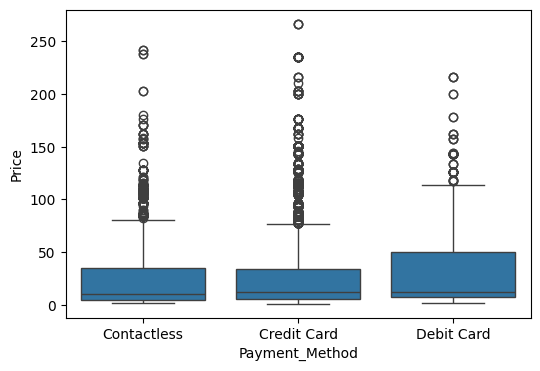

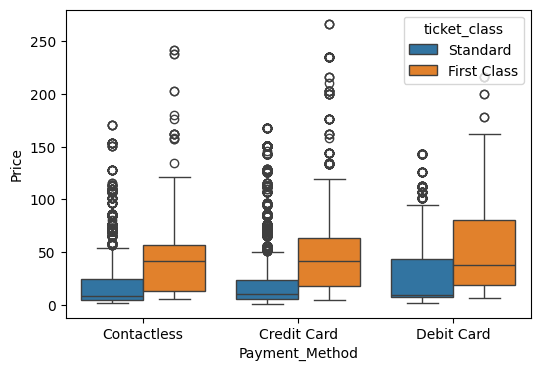

In [40]:
#Debit card transactions seem to have a higher average ticket price than others across buying channels, ticket types, and class
debit_transaction = df_uk_train[['Payment_Method', 'Price']][df_uk_train['Payment_Method'] == 'Debit Card']
debit_transaction.describe()

plt.figure(figsize=(6, 4))
sns.boxplot(data= df_uk_train,x='Payment_Method',y='Price')
plt.figure(figsize=(6, 4))
sns.boxplot(data= df_uk_train,x='Payment_Method',y='Price',hue='ticket_class')


Text(0.5, 1.0, 'Ticket Price Distribution by Payment Method')

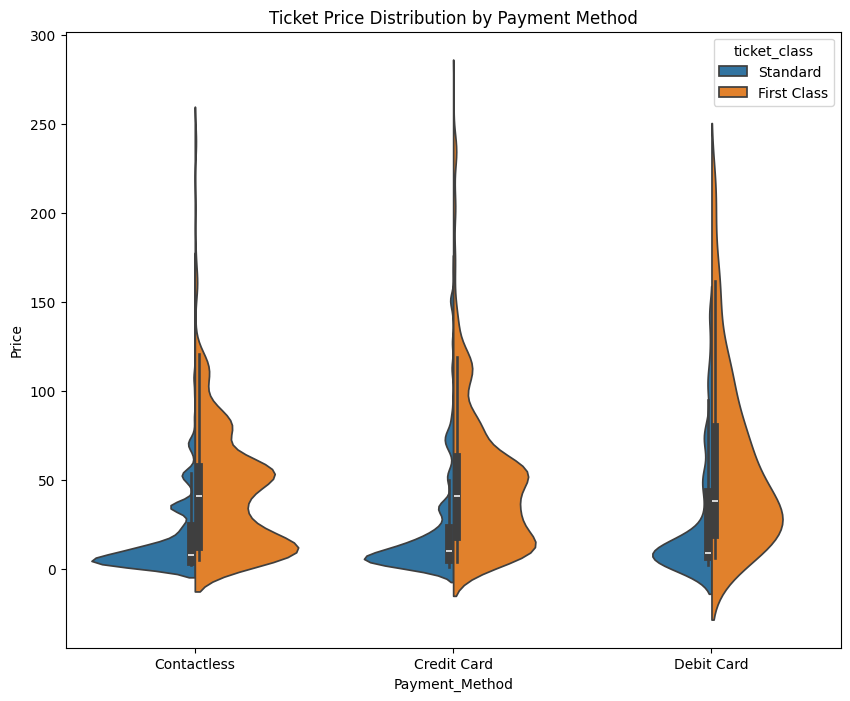

In [38]:
#Ticket Price Distribution by Payment Method
plt.figure(figsize=(10, 8))

sns.violinplot(data=df_uk_train, x='Payment_Method', y='Price', hue='ticket_class', split=True)
plt.title('Ticket Price Distribution by Payment Method')


Time-to-Journey Analysis


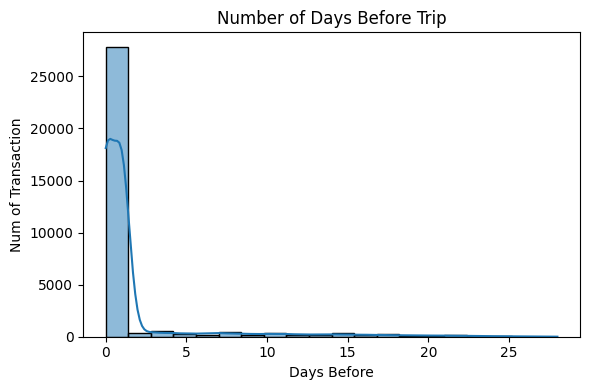

  ticket_type  days_before
0     Advance     2.984796
1     Anytime     0.000000
2    Off-Peak     0.000000


,days_before
count,5340.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [35]:
#calculate journey date proximity
df_uk_train['days_before'] = (df_uk_train['Date_of_Journey'] - df_uk_train['Date_of_Purchase']).dt.days
df_uk_train.head()
df_uk_train['days_before'].describe()

plt.figure(figsize=(6, 4))
sns.histplot(df_uk_train['days_before'],bins=20,kde=True)
plt.title('Number of Days Before Trip')
plt.ylabel('Num of Transaction')
plt.xlabel('Days Before')
plt.tight_layout()

plt.show()

daysbefore_average = df_uk_train.groupby('ticket_type')['days_before'].agg('mean').reset_index()
print(daysbefore_average)

advance = df_uk_train[['ticket_type', 'days_before']][df_uk_train['ticket_type'] == 'Advance']
advance.describe()

anytime = df_uk_train[['ticket_type', 'days_before']][df_uk_train['ticket_type'] == 'Anytime']
anytime.describe()

In [36]:
##Analyze how far in advance people book across: Ticket types, Channels, Price ranges

#average days of purchase before trips for each purchase channel
daysbefore_average = df_uk_train.groupby(['Purchase_Type','ticket_class'])['days_before'].agg('mean')
print(daysbefore_average)
#not significant for channels & ticket class

daysbefore_average = df_uk_train.groupby('ticket_type')['days_before'].agg('mean')
print(daysbefore_average)

#advance usually get purchased avg of 3 days before, no significant different between online and station

daysbefore_average = df_uk_train.groupby(['ticket_type','Purchase_Type'])['days_before'].agg('mean')
print(daysbefore_average)

Purchase_Type  ticket_class
Online         First Class     1.633352
               Standard        1.690920
Station        First Class     1.628034
               Standard        1.612990
Name: days_before, dtype: float64
ticket_type
Advance     2.984796
Anytime     0.000000
Off-Peak    0.000000
Name: days_before, dtype: float64
ticket_type  Purchase_Type
Advance      Online           3.019443
             Station          2.935207
Anytime      Online           0.000000
             Station          0.000000
Off-Peak     Online           0.000000
             Station          0.000000
Name: days_before, dtype: float64


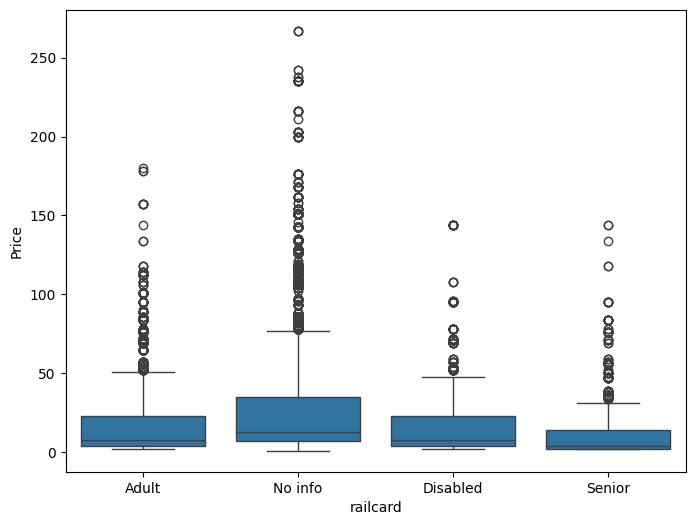

In [29]:
# Price by railcard usage
plt.figure(figsize=(8, 6))
sns.boxplot(x='railcard', y='Price', data=df_uk_train)
plt.show()

price_range
FC Medium          2.102389
Standard Low       2.096663
FC Low             1.764268
Standard Medium    1.590427
Standard High      1.354495
FC High            0.617535
Name: days_before, dtype: float64
       price_range ticket_type  days_before
0    Standard High     Advance     3.069906
1  Standard Medium     Advance     3.058048
2     Standard Low     Advance     2.883260
3        FC Medium     Advance     2.865116
4          FC High     Advance     2.777143
5           FC Low     Advance     2.766537


<ipython-input-37-1869701627>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daysbefore_advance,x='price_range',y='days_before',palette='mako')


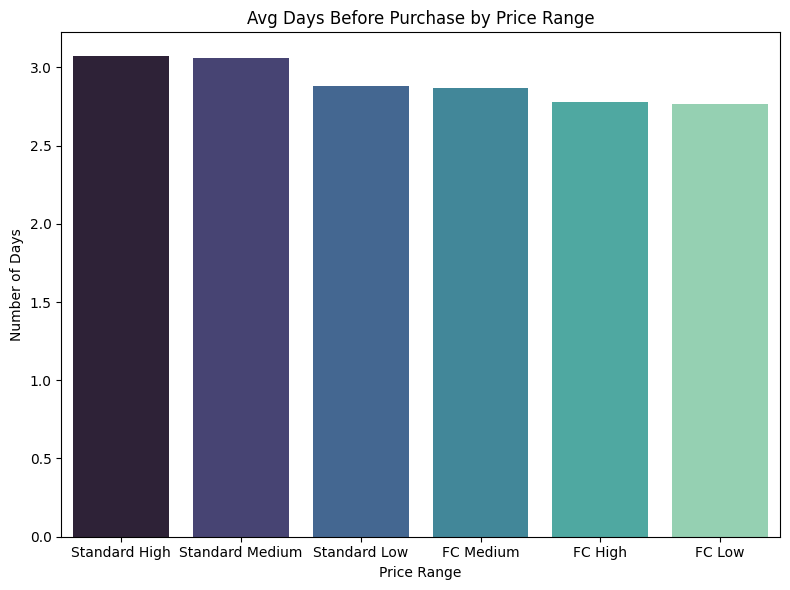

In [37]:
#how far in advance people book across price ranges --> price sensitivity
daysbefore_dayrange = df_uk_train.groupby(['price_range'])['days_before'].agg('mean').sort_values(ascending=False)
print(daysbefore_dayrange)

daysbefore_dayrange = df_uk_train.groupby(['price_range','ticket_type'])['days_before'].agg('mean').sort_values(ascending=False).reset_index()


#advance ticket only. since this is more accurate (remove the anytime & other type from the denominators)
daysbefore_advance = daysbefore_dayrange[daysbefore_dayrange['ticket_type'] == 'Advance'].sort_values(by='days_before', ascending=False)
print(daysbefore_advance)

heatmap_data = daysbefore_advance.pivot(index='price_range', columns='ticket_type', values='days_before')
plt.figure(figsize=(8, 6))
sns.barplot(data=daysbefore_advance,x='price_range',y='days_before',palette='mako')
plt.title('Avg Days Before Purchase by Price Range')
plt.ylabel('Number of Days')
plt.xlabel('Price Range')
plt.tight_layout()
plt.show()

Overall averages are weighted averages across all ticket types in a price_range.

Detailed breakdown shows variation within ticket types, revealing groups with very low or zero days_before that pull the overall average down.
--> very different breakdowns and average time to book ticket when add in ticket_type

Standard groups across all price ranges are more mindful about their travel plan and book a bit earlier than FC travelers -- small difference but worth noticing. Medium-high price range travelers make their plan early.

Breakdown by Railcard

In [38]:
###Railcard usage behavior

#percentage of usage
railcard_counts = df_uk_train['railcard'].value_counts()
railcard_percentage = (railcard_counts / railcard_counts.sum()) * 100
print(railcard_percentage.round(2))

railcard
No info     66.09
Adult       15.31
Disabled     9.76
Senior       8.85
Name: count, dtype: float64


In [39]:
#breakdown by ticket type: no noticeable different between groups in term of ticket typpes
railcard_usage = df_uk_train.groupby(['railcard', 'ticket_type']).size().reset_index(name='count').sort_values(by=['railcard','count'], ascending=False)

# Calculate percentage within each ticket_type using lambda. the railcard level is the x.sum(). x is the ticket type bucket
railcard_usage['percentage'] = railcard_usage.groupby('railcard')['count'].transform(lambda x: x/x.sum()*100).round(2)
railcard_usage

,railcard,ticket_type,count,percentage
9,Senior,Advance,1564,55.86
11,Senior,Off-Peak,627,22.39
10,Senior,Anytime,609,21.75
6,No info,Advance,11625,55.57
8,No info,Off-Peak,5922,28.31
7,No info,Anytime,3371,16.12
3,Disabled,Advance,1661,53.77
5,Disabled,Off-Peak,879,28.46
4,Disabled,Anytime,549,17.77
0,Adult,Advance,2711,55.94


In [40]:
#What ticket class is more common? Standard, for sure
railcard_class = df_uk_train.groupby(['railcard','ticket_class']).size().reset_index(name='count').sort_values(by=['railcard','count'], ascending=False)
railcard_class

,railcard,ticket_class,count
7,Senior,Standard,2531
6,Senior,First Class,269
5,No info,Standard,18933
4,No info,First Class,1985
3,Disabled,Standard,2775
2,Disabled,First Class,314
1,Adult,Standard,4356
0,Adult,First Class,490


In [41]:
#How does railcard usage affect ticket price?
#--> What is the average price difference between tickets with and without a railcard in general? by class/type?
railcard_price1 = df_uk_train.groupby(['railcard'])['Price'].agg('mean').round(2).sort_values(ascending=False)
railcard_price1

railcard_class2 = df_uk_train.groupby(['ticket_class','railcard'])['Price'].agg('mean').round(2)
railcard_class2

railcard_class3 = df_uk_train.groupby(['ticket_type','railcard'])['Price'].agg('mean').round(2).reset_index()
railcard_class3.sort_values(by=['ticket_type','Price'],ascending=False)

,ticket_type,railcard,Price
10,Off-Peak,No info,29.57
8,Off-Peak,Adult,20.52
9,Off-Peak,Disabled,14.77
11,Off-Peak,Senior,12.91
6,Anytime,No info,47.10
5,Anytime,Disabled,34.18
4,Anytime,Adult,28.10
7,Anytime,Senior,14.77
2,Advance,No info,20.63
0,Advance,Adult,13.42


# Journey Analysis

- Which route length are most busy for each class/type?
- Which days of the week (weekend-weekday) are popular to diff class & type
- Which time of the day are popular to diff class & type

**Which route length are most busy for each class/type?**

In [42]:
#create a trip length column (categorical)
def classify_trip_duration(duration):
  if duration <= 0.5:
    return 'Very Short'
  elif 0.5 < duration < 1.5:
    return 'Short'
  elif 1.5 <= duration < 3:
    return 'Medium'
  else:
    return 'Medium-Long'

df_uk_train['trip_length'] = df_uk_train['trip_duration'].apply(classify_trip_duration)
df_uk_train['trip_length'].head()

frequencytable6 = df_uk_train['trip_length'].value_counts()
print(frequencytable6)

trip_length
Short          14626
Very Short      8955
Medium          7842
Medium-Long      230
Name: count, dtype: int64


In [43]:
#Which departure and arrival station pairs are most common?
routefrequency = df_uk_train['od_route'].value_counts().reset_index()
routefrequency['count'].sort_values(ascending=False)
routefrequency.head(10)

,od_route,count
0,Manchester Piccadilly-Liverpool Lime Street,4628
1,London Euston-Birmingham New Street,4209
2,London Kings Cross-York,3922
3,London Paddington-Reading,3873
4,London St Pancras-Birmingham New Street,3471
5,Liverpool Lime Street-Manchester Piccadilly,3002
6,Liverpool Lime Street-London Euston,1097
7,London Euston-Manchester Piccadilly,712
8,Birmingham New Street-London St Pancras,702
9,London Paddington-Oxford,485


In [44]:
#are those medium/short/long?
routefreq2 = df_uk_train.groupby(['od_route','trip_length']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)
routefreq2.head(10)

,od_route,trip_length,count
40,Manchester Piccadilly-Liverpool Lime Street,Very Short,4628
24,London Euston-Birmingham New Street,Short,4209
30,London Kings Cross-York,Medium,3922
35,London Paddington-Reading,Short,3873
36,London St Pancras-Birmingham New Street,Short,3471
22,Liverpool Lime Street-Manchester Piccadilly,Very Short,3002
19,Liverpool Lime Street-London Euston,Medium,1097
25,London Euston-Manchester Piccadilly,Medium,712
6,Birmingham New Street-London St Pancras,Short,702
34,London Paddington-Oxford,Medium,485


In [45]:
#average price by routes
route_price = df_uk_train.groupby(['od_route','trip_length'])['Price'].agg(['mean','count']).round(2).sort_values(by = 'count',ascending=False).reset_index()
route_price

,od_route,trip_length,mean,count
0,Manchester Piccadilly-Liverpool Lime Street,Very Short,3.74,4628
1,London Euston-Birmingham New Street,Short,11.96,4209
2,London Kings Cross-York,Medium,46.71,3922
3,London Paddington-Reading,Short,16.88,3873
4,London St Pancras-Birmingham New Street,Short,15.23,3471
...,...,...,...,...
59,Manchester Piccadilly-Warrington,Very Short,3.53,15
60,York-Liverpool Lime Street,Medium,21.53,15
61,Manchester Piccadilly-York,Medium,14.13,15
62,York-Wakefield,Very Short,9.87,15


In [46]:
#Which route length are most busy
route_class= df_uk_train.groupby(['trip_length'])['Price'].agg(['mean','count']).reset_index().sort_values(by = ['count'], ascending=False)
route_class['percentage'] = route_class['count'].transform(lambda x: x/x.sum()*100).round(2)
route_class

,trip_length,mean,count,percentage
2,Short,15.637290,14626,46.21
3,Very Short,4.472138,8955,28.29
0,Medium,59.192425,7842,24.77
1,Medium-Long,39.021739,230,0.73


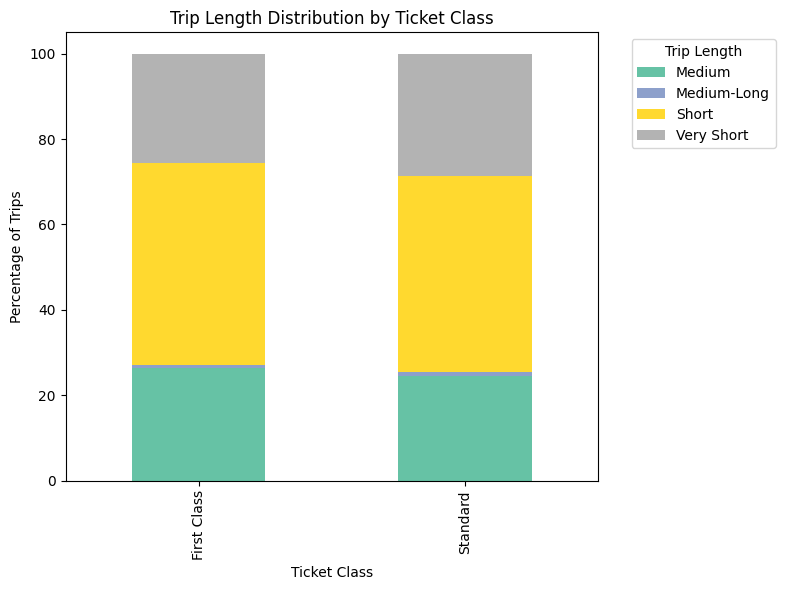

In [47]:
#Which route length are most busy for each class/type? each price range?
route_class= df_uk_train.groupby(['ticket_class','trip_length'])['Price'].agg(['mean','count']).reset_index().sort_values(by = ['ticket_class','count'], ascending=False)
route_class['percentage'] = route_class.groupby(['ticket_class'])['count'].transform(lambda x: x/x.sum()*100).round(2)
route_class

#clas is the same as overall
pivot_data = route_class.pivot(index='ticket_class', columns='trip_length', values='percentage').fillna(0)
pivot_data.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

plt.title('Trip Length Distribution by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Percentage of Trips')
plt.legend(title='Trip Length', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [48]:
route_type= df_uk_train.groupby(['ticket_type','trip_length'])['Price'].agg(['mean','count']).reset_index().sort_values(by = ['ticket_type','count'], ascending=False)
route_type['percentage'] = route_type.groupby(['ticket_type'])['count'].transform(lambda x: x/x.sum()*100).round(2)
route_type

,ticket_type,trip_length,mean,count,percentage
10,Off-Peak,Short,17.273112,4251,48.57
11,Off-Peak,Very Short,5.134161,2415,27.59
8,Off-Peak,Medium,66.409739,2033,23.23
9,Off-Peak,Medium-Long,47.169811,53,0.61
6,Anytime,Short,24.238870,2336,43.75
4,Anytime,Medium,88.896901,1581,29.61
7,Anytime,Very Short,6.804825,1368,25.62
5,Anytime,Medium-Long,51.490909,55,1.03
2,Advance,Short,12.272795,8039,45.78
3,Advance,Very Short,3.546017,5172,29.45


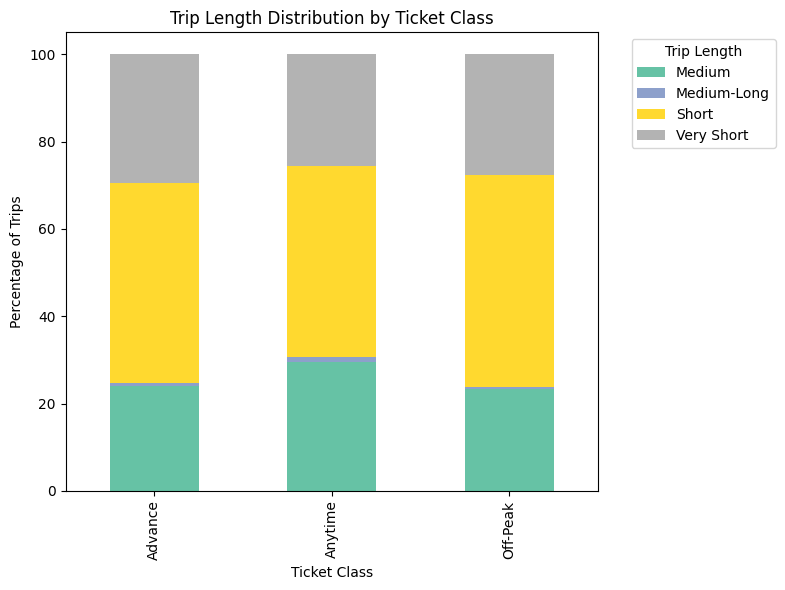

In [49]:

pivot_data = route_type.pivot(index='ticket_type', columns='trip_length', values='percentage').fillna(0)
pivot_data.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

plt.title('Trip Length Distribution by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Percentage of Trips')
plt.legend(title='Trip Length', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Which days of the week (weekend-weekday) are popular to diff class & type**

---



In [50]:
#change departure date to date of the week
df_uk_train['day_of_week'] = df_uk_train['Date_of_Purchase'].dt.day_name()
df_uk_train['day_of_week'].head()

,day_of_week
0,Friday
1,Saturday
2,Tuesday
3,Wednesday
4,Wednesday


In [51]:
type_day = df_uk_train.groupby(['ticket_type', 'day_of_week'])['Price'].agg(['mean','count']).reset_index().sort_values(by = ['ticket_type','count'], ascending=False)
type_day['percentage'] = type_day.groupby('ticket_type')['count'].transform(lambda x: x / x.sum() * 100).round(2)
type_day


,ticket_type,day_of_week,mean,count,percentage
17,Off-Peak,Sunday,26.381877,2163,24.71
16,Off-Peak,Saturday,27.485671,1989,22.73
18,Off-Peak,Thursday,23.857588,962,10.99
20,Off-Peak,Wednesday,22.893684,950,10.85
19,Off-Peak,Tuesday,24.694784,901,10.29
14,Off-Peak,Friday,24.446548,898,10.26
15,Off-Peak,Monday,25.536558,889,10.16
13,Anytime,Wednesday,39.793103,1160,21.72
12,Anytime,Tuesday,40.383848,1102,20.64
7,Anytime,Friday,39.397695,1041,19.49


<ipython-input-52-1918256464>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=type_day, x='day_of_week', y='percentage', hue='ticket_type', palette='Set2',ci=None)


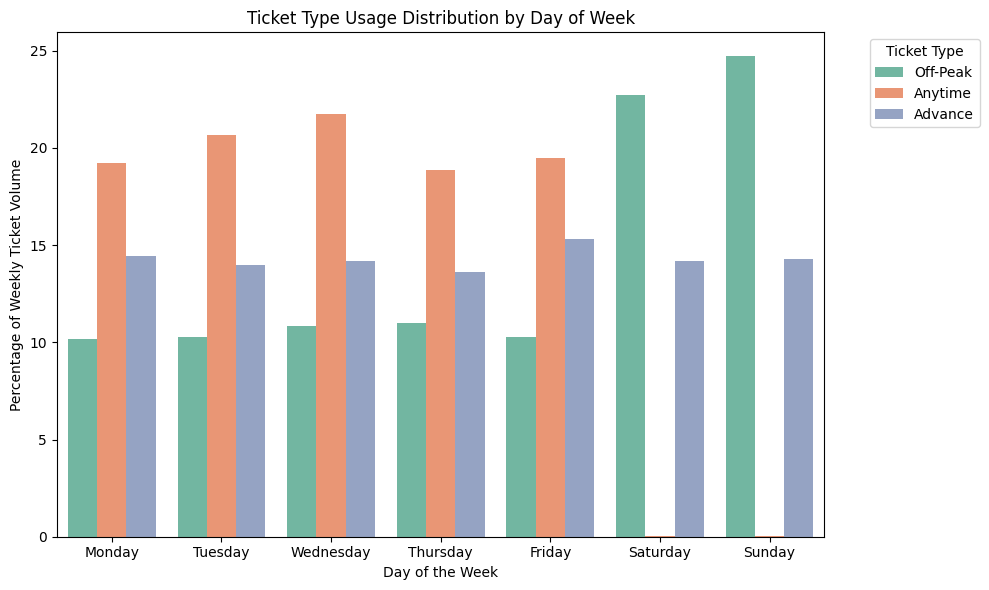

In [52]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
type_day['day_of_week'] = pd.Categorical(type_day['day_of_week'], categories=weekday_order, ordered=True)

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=type_day, x='day_of_week', y='percentage', hue='ticket_type', palette='Set2',ci=None)

plt.title('Ticket Type Usage Distribution by Day of Week')
plt.ylabel('Percentage of Weekly Ticket Volume')
plt.xlabel('Day of the Week')
plt.legend(title='Ticket Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [53]:
class_day = df_uk_train.groupby(['ticket_class', 'day_of_week'])['Price'].agg(['mean','count']).reset_index().sort_values(by = ['ticket_class','count'], ascending=False)
class_day['percentage'] = class_day.groupby('ticket_class')['count'].transform(lambda x: x / x.sum() * 100).round(2)
class_day


,ticket_class,day_of_week,mean,count,percentage
10,Standard,Sunday,18.631082,4234,14.81
7,Standard,Friday,21.118362,4199,14.68
13,Standard,Wednesday,21.467180,4159,14.54
9,Standard,Saturday,19.521664,4039,14.12
12,Standard,Tuesday,21.740860,4021,14.06
8,Standard,Monday,21.743958,3972,13.89
11,Standard,Thursday,20.912868,3971,13.89
1,First Class,Monday,48.724638,483,15.79
6,First Class,Wednesday,50.327314,443,14.49
3,First Class,Sunday,47.914027,442,14.45


In [54]:
breakdown_day = df_uk_train.groupby(['ticket_class','ticket_type', 'day_of_week'])['Price'].agg(['mean','count']).reset_index().sort_values(by = ['ticket_class','ticket_type','count'], ascending=False)
breakdown_day['percentage'] = breakdown_day.groupby(['ticket_class','ticket_type'])['count'].transform(lambda x: x / x.sum() * 100).round(2)
breakdown_day

,ticket_class,ticket_type,day_of_week,mean,count,percentage
36,Standard,Off-Peak,Sunday,23.095723,1964,24.71
35,Standard,Off-Peak,Saturday,24.339434,1803,22.68
37,Standard,Off-Peak,Thursday,21.547297,888,11.17
39,Standard,Off-Peak,Wednesday,19.701510,861,10.83
33,Standard,Off-Peak,Friday,22.157442,813,10.23
34,Standard,Off-Peak,Monday,22.981504,811,10.20
38,Standard,Off-Peak,Tuesday,20.634901,808,10.17
32,Standard,Anytime,Wednesday,36.087248,1043,21.51
31,Standard,Anytime,Tuesday,36.442786,1005,20.72
26,Standard,Anytime,Friday,35.234110,944,19.46
